In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import string
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Project_datasets_pds/news.csv'
df = pd.read_csv(file_path)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [4]:
print("Unique values in the 'label' column:")
print(df['label'].unique())

Unique values in the 'label' column:
['FAKE' 'REAL']


In [5]:
# Defined the mapping
label_mapping = {'REAL': 0, 'FAKE': 1}

# Mapping the labels
df['label'] = df['label'].map(label_mapping)

In [6]:
print("Unique values in the 'label' column:")
print(df['label'].unique())

Unique values in the 'label' column:
[1 0]


In [7]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 198.1+ KB


In [9]:
df.shape

(6335, 4)

In [10]:
file_path1 = '/content/drive/MyDrive/Project_datasets_pds/WELFake_Dataset.csv'
df_1 = pd.read_csv(file_path1)
print(df_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB
None


In [11]:
df_1.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [12]:
df_1.shape

(72134, 4)

In [13]:
print("Dataset 1 Shape:", df.shape)
print("Dataset 2 Shape:", df_1.shape)

Dataset 1 Shape: (6335, 4)
Dataset 2 Shape: (72134, 4)


In [14]:
print("Columns in Dataset 1:", df.columns)
print("Columns in Dataset 2:", df_1.columns)

Columns in Dataset 1: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')
Columns in Dataset 2: Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')


In [15]:
# Combined both datasets
data = pd.concat([df, df_1], ignore_index=True)

# Verify the combined dataset
print("Combined Dataset Shape:", data.shape)
data.head()

Combined Dataset Shape: (78469, 4)


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0


In [16]:
data = data.drop(columns=['Unnamed: 0'])
data.head()
print("Column Names:")
print(data.columns)

Column Names:
Index(['title', 'text', 'label'], dtype='object')


Performing EDA


1. Class Distribution: Plotted the distribution of “Fake” vs. “Real” news.
2.Text Length Distribution:Analyzed the length of articles to see if it varies by class.
3.Sentiment Polarity:Used TextBlob to calculate sentiment polarity.
4.WordCloud Generation:Generate WordClouds for both classes.




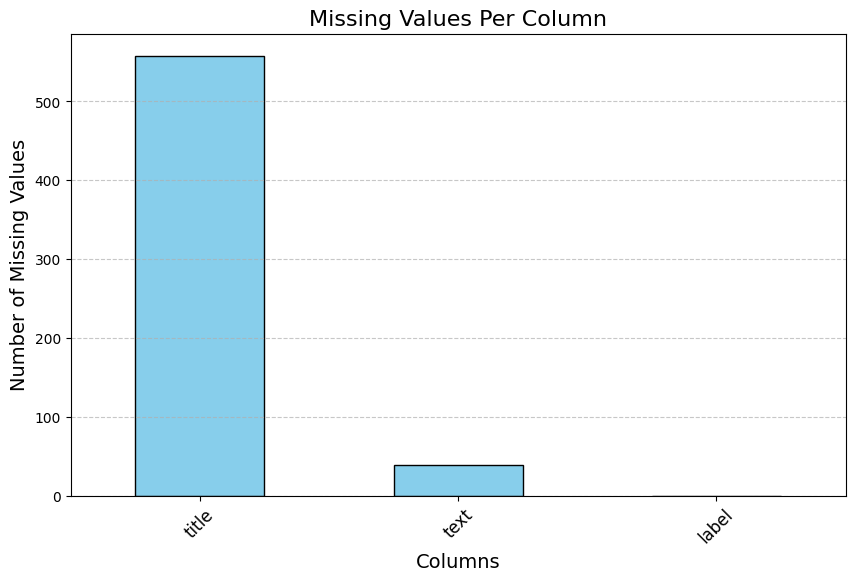

In [17]:
# Counting missing values for each column
missing_counts = data.isnull().sum()

# Ploting a bar chart for missing values
plt.figure(figsize=(10, 6))
missing_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Missing Values Per Column", fontsize=16)
plt.xlabel("Columns", fontsize=14)
plt.ylabel("Number of Missing Values", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [18]:
data['title'] = data['title'].fillna('No Title')

# Filling the  missing values in 'text' with a placeholder
data['text'] = data['text'].fillna("No Content")
# Verify if there are any missing values left
print("Missing values after filling:")
print(data.isnull().sum())
# Combined 'title' and 'text' into a single column for feature extraction
data['combined_text'] = data['title'] + " " + data['text']
print("\nUpdated Dataset:")
data.head()
#saveing the
data.to_csv("cleaned_dataset.csv", index=False)


Missing values after filling:
title    0
text     0
label    0
dtype: int64

Updated Dataset:


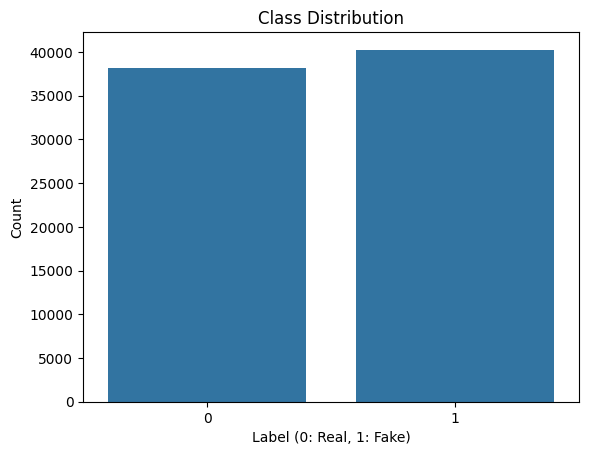

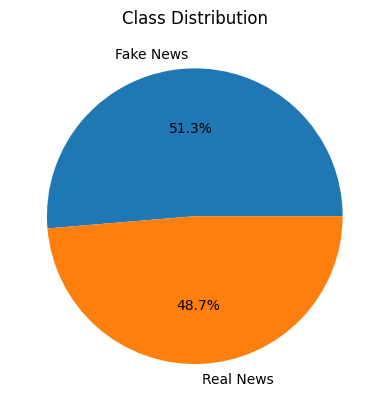

In [19]:
# Bar plot and pie chart  for class distribution
sns.countplot(x='label', data=data)
plt.title("Class Distribution")
plt.xlabel("Label (0: Real, 1: Fake)")
plt.ylabel("Count")
plt.show()


data['label'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=['Fake News', 'Real News'])
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

Log transformation reduces the skewness of data by applying a logarithmic scale.

<ipython-input-20-1836d907caf9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_text_length'] = np.log1p(filtered_data['text_length'])


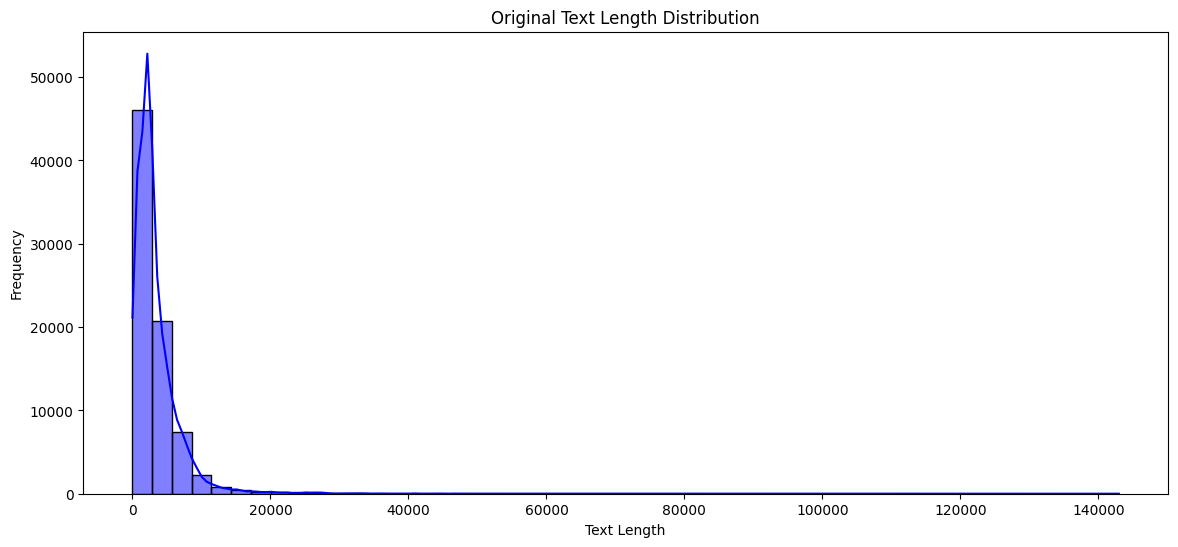

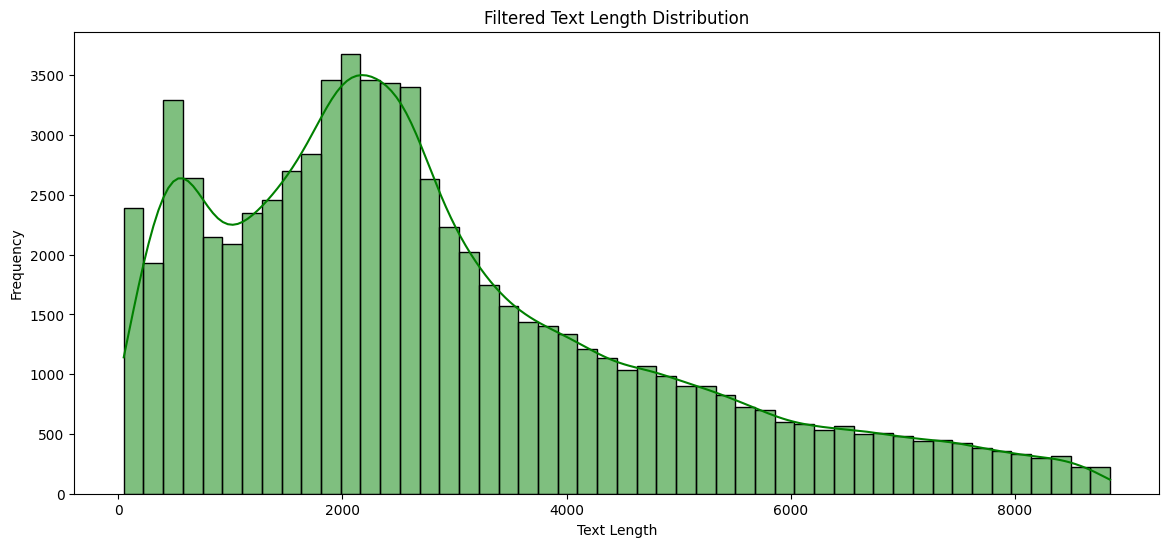

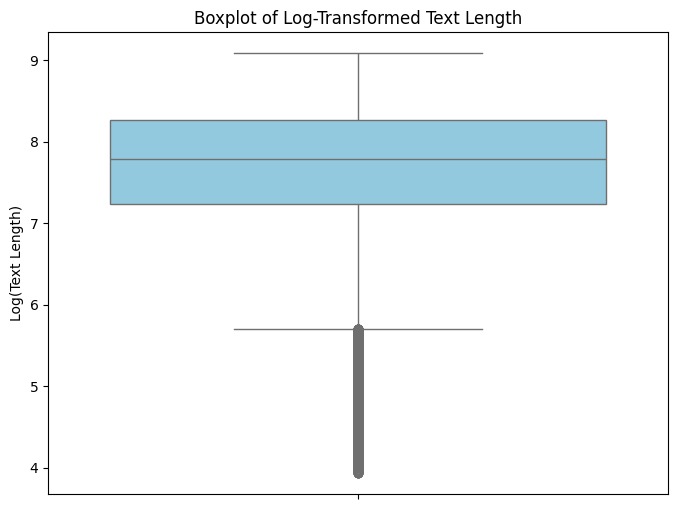

Text Length Statistics (Before Filtering):
count     78469.000000
mean       3384.555799
std        3880.093946
min           1.000000
25%        1399.000000
50%        2473.000000
75%        4240.000000
max      142961.000000
Name: text_length, dtype: float64

Text Length Statistics (After Filtering):
count    73374.000000
mean      2833.944981
std       1980.498270
min         50.000000
25%       1393.250000
50%       2401.000000
75%       3882.750000
max       8849.000000
Name: text_length, dtype: float64


In [20]:
# Calculating the Text Lengths
data['text_length'] = data['text'].apply(len)

# Defining thresholds for filtering
lower_threshold = 50
upper_threshold = np.percentile(data['text_length'], 95)

# Filterd dataset based on thresholds
filtered_data = data[(data['text_length'] >= lower_threshold) & (data['text_length'] <= upper_threshold)]

# Normalized text lengths using log transformation
filtered_data['log_text_length'] = np.log1p(filtered_data['text_length'])

# Visualizations
plt.figure(figsize=(14, 6))
sns.histplot(data['text_length'], bins=50, kde=True, color='blue')
plt.title("Original Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(filtered_data['text_length'], bins=50, kde=True, color='green')
plt.title("Filtered Text Length Distribution")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=filtered_data['log_text_length'], color='skyblue')
plt.title("Boxplot of Log-Transformed Text Length")
plt.ylabel("Log(Text Length)")
plt.show()

# Summary of statistics
print("Text Length Statistics (Before Filtering):")
print(data['text_length'].describe())

print("\nText Length Statistics (After Filtering):")
print(filtered_data['text_length'].describe())

In [21]:
# Checking the shape of the filtered dataset
print(f"Filtered Dataset Shape: {filtered_data.shape}")
filtered_data.head()

Filtered Dataset Shape: (73374, 6)


,title,text,label,combined_text,text_length,log_text_length
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",1,You Can Smell Hillary’s Fear Daniel Greenfield...,7518,8.925188
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,1,Watch The Exact Moment Paul Ryan Committed Pol...,2646,7.881182
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,0,Kerry to go to Paris in gesture of sympathy U....,2543,7.841493
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",1,Bernie supporters on Twitter erupt in anger ag...,2660,7.886457
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,0,The Battle of New York: Why This Primary Matte...,1840,7.518064


<ipython-input-22-30b4f9ff8d9b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_length', data=filtered_data, palette='Set3')


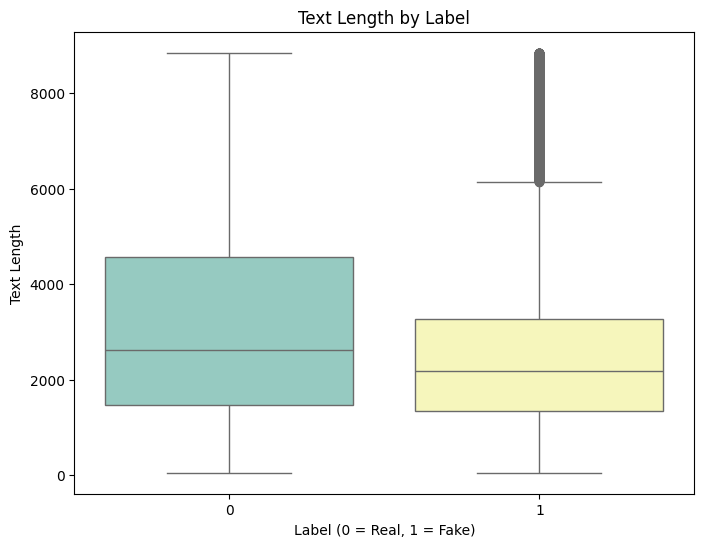

Mean Text Length by Label:
label
0    3136.475089
1    2537.245951
Name: text_length, dtype: float64


In [22]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='text_length', data=filtered_data, palette='Set3')
plt.title("Text Length by Label")
plt.xlabel("Label (0 = Real, 1 = Fake)")
plt.ylabel("Text Length")
plt.show()

# Mean text length by label
print("Mean Text Length by Label:")
print(filtered_data.groupby('label')['text_length'].mean())

Most Common Words in Real News:
[('the', 975795), ('to', 532044), ('of', 471595), ('a', 431079), ('and', 408654), ('in', 366354), ('that', 219028), ('on', 196085), ('for', 173815), ('is', 145314), ('with', 118042), ('said', 117946), ('was', 114551), ('The', 114270), ('he', 105294), ('as', 104816), ('by', 93267), ('has', 93000), ('his', 90057), ('have', 84597)]

Most Common Words in Fake News:
[('the', 758812), ('to', 434975), ('of', 377559), ('and', 339869), ('a', 309151), ('in', 241914), ('that', 206523), ('is', 172659), ('for', 135357), ('on', 117370), ('s', 114916), ('with', 92949), ('was', 91606), ('as', 81542), ('Trump', 79164), ('he', 78870), ('it', 78767), ('be', 76674), ('are', 76228), ('The', 74880)]


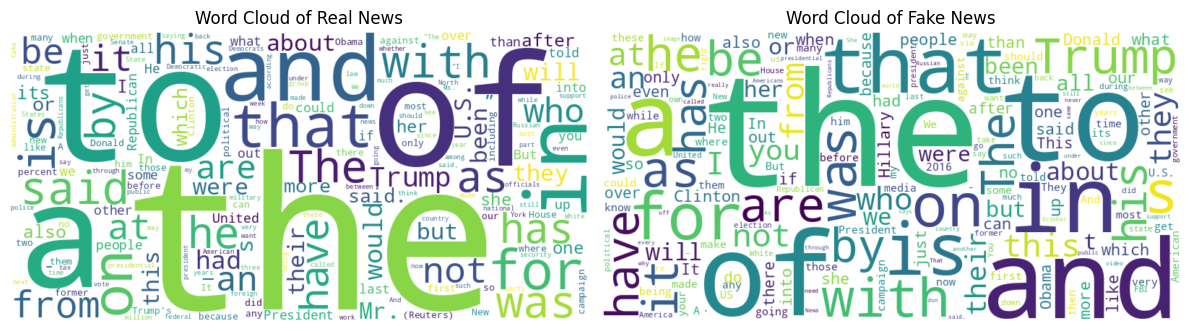

In [41]:
from collections import Counter
from wordcloud import WordCloud

# Separating  text data by class
real_text = " ".join(filtered_data[filtered_data['label'] == 0]['text'])  # Real news
fake_text = " ".join(filtered_data[filtered_data['label'] == 1]['text'])  # Fake news

# Count word frequencies for each class
real_word_freq = Counter(real_text.split())
fake_word_freq = Counter(fake_text.split())


print("Most Common Words in Real News:")
print(real_word_freq.most_common(20))

print("\nMost Common Words in Fake News:")
print(fake_word_freq.most_common(20))

# Generate word clouds for each class
real_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(real_word_freq)
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fake_word_freq)

# Plot word clouds
plt.figure(figsize=(12, 6))

# Word Cloud for Real News
plt.subplot(1, 2, 1)
plt.imshow(real_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Real News")

# Word Cloud for Fake News
plt.subplot(1, 2, 2)
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Fake News")

plt.tight_layout()
plt.show()

<ipython-input-24-591a937eca38>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment'] = filtered_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-24-591a937eca38>:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-24-591a937eca38>:24: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


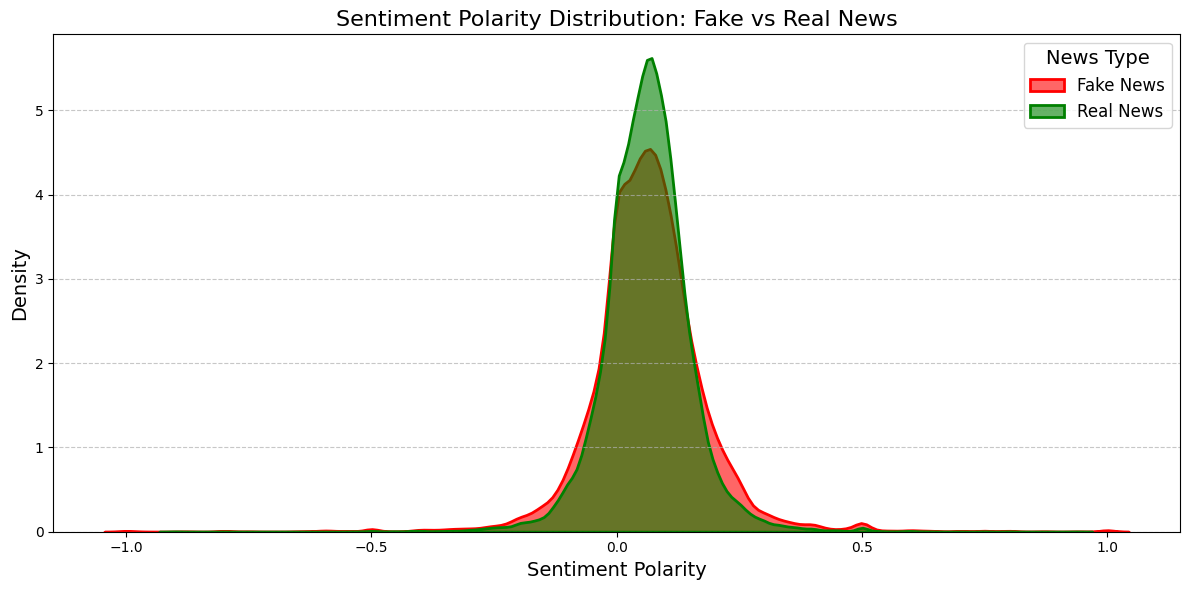

In [24]:
from textblob import TextBlob


# Calculate sentiment polarity for each text
filtered_data['sentiment'] = filtered_data['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Separate Fake and Real news
fake_news = filtered_data[filtered_data['label'] == 1]
real_news = filtered_data[filtered_data['label'] == 0]

# Enhanced Visualization
plt.figure(figsize=(12, 6))

sns.kdeplot(
    fake_news['sentiment'],
    shade=True,
    color='red',
    label='Fake News',
    alpha=0.6,
    linewidth=2
)

sns.kdeplot(
    real_news['sentiment'],
    shade=True,
    color='green',
    label='Real News',
    alpha=0.6,
    linewidth=2
)

plt.title("Sentiment Polarity Distribution: Fake vs Real News", fontsize=16)
plt.xlabel("Sentiment Polarity", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend(title="News Type", fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-25-9d89853fbd54>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['punctuation_count'] = filtered_data['text'].apply(


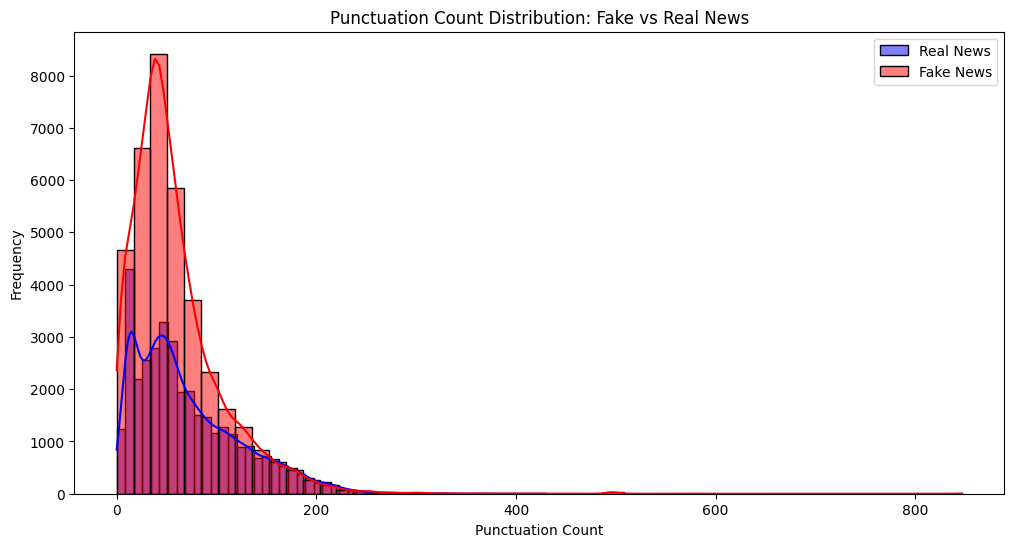

Punctuation Count Statistics for Real News:
count    36330.000000
mean        70.952904
std         53.169869
min          0.000000
25%         30.000000
50%         57.000000
75%        102.000000
max        429.000000
Name: punctuation_count, dtype: float64

Punctuation Count Statistics for Fake News:
count    37044.000000
mean        59.139510
std         46.626431
min          0.000000
25%         29.000000
50%         48.000000
75%         77.000000
max        847.000000
Name: punctuation_count, dtype: float64


In [25]:
# Calculating punctuation count for each article
filtered_data['punctuation_count'] = filtered_data['text'].apply(
    lambda x: sum([1 for char in x if char in string.punctuation])
)

# Separating data by class
real_data = filtered_data[filtered_data['label'] == 0]  # Real news
fake_data = filtered_data[filtered_data['label'] == 1]  # Fake news

# Plot punctuation count distribution for Real News
plt.figure(figsize=(12, 6))
sns.histplot(real_data['punctuation_count'], bins=50, kde=True, color='blue', label='Real News')
sns.histplot(fake_data['punctuation_count'], bins=50, kde=True, color='red', label='Fake News')
plt.title("Punctuation Count Distribution: Fake vs Real News")
plt.xlabel("Punctuation Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Summary statistics for Real News
print("Punctuation Count Statistics for Real News:")
print(real_data['punctuation_count'].describe())

# Summary statistics for Fake News
print("\nPunctuation Count Statistics for Fake News:")
print(fake_data['punctuation_count'].describe())

In [39]:
# Calculate punctuation count for each text
data['punctuation_count'] = data['text'].apply(lambda x: sum(1 for char in x if char in string.punctuation))
print(data.columns)  # This will list all the columns in the DataFrame

Index(['title', 'text', 'label', 'combined_text', 'text_length',
       'punctuation_count', 'exclamation_count', 'question_mark_count',
       'period_count', 'capped_exclamation_count', 'question_count'],
      dtype='object')


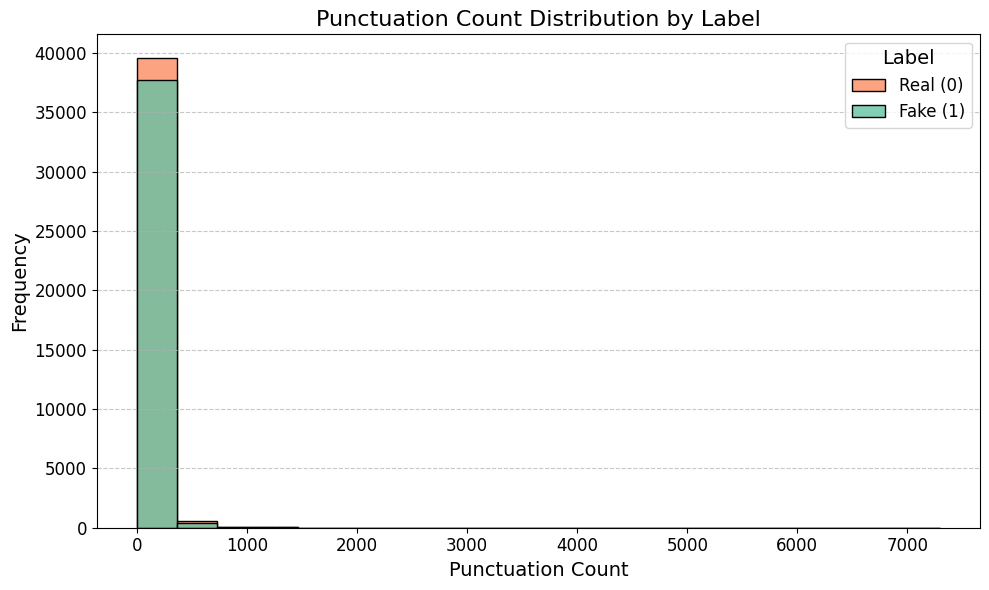

In [40]:
# Histogram for punctuation counts with class labels
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='punctuation_count', hue='label', bins=20, kde=False, palette=["#66c2a5", "#fc8d62"], alpha=0.8)
plt.title("Punctuation Count Distribution by Label", fontsize=16)
plt.xlabel("Punctuation Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Label", labels=["Real (0)", "Fake (1)"], fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [28]:
# Separating punctuation counts by label
real_punctuation = data[data['label'] == 0]['punctuation_count']
fake_punctuation = data[data['label'] == 1]['punctuation_count']

# Perform t-test
t_stat, p_value = ttest_ind(real_punctuation, fake_punctuation)
print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("Significant difference in punctuation patterns between real and fake news.")
else:
    print("No significant difference in punctuation patterns.")

T-statistic: 14.509919029372151
P-value: 1.2087851134108754e-47
Significant difference in punctuation patterns between real and fake news.


<ipython-input-29-dae03aca6cde>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='exclamation_count', data=data, palette='Set2')


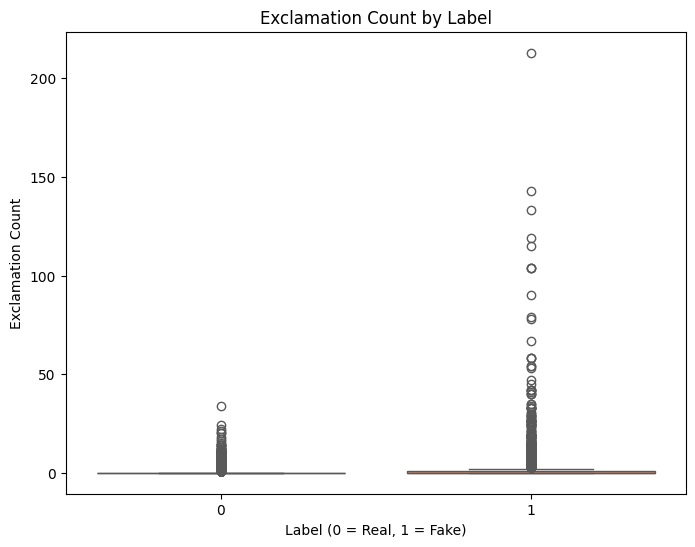

In [29]:
# Counting specific punctuation marks
data['exclamation_count'] = data['text'].str.count("!")
data['question_mark_count'] = data['text'].str.count("\?")
data['period_count'] = data['text'].str.count("\.")

# Visualizing exclamation marks by label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='exclamation_count', data=data, palette='Set2')
plt.title("Exclamation Count by Label")
plt.xlabel("Label (0 = Real, 1 = Fake)")
plt.ylabel("Exclamation Count")
plt.show()

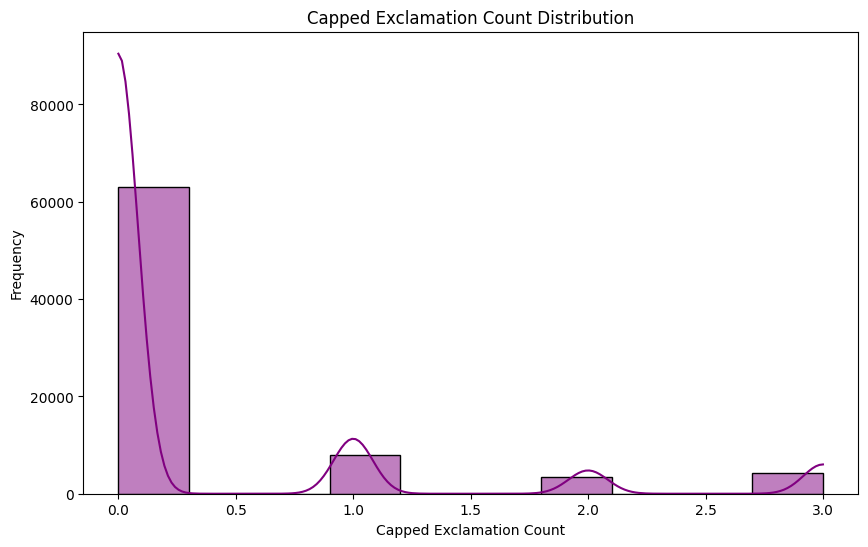

In [30]:
# Counting the number of exclamation marks in each text
data['exclamation_count'] = data['text'].apply(lambda x: x.count('!'))
# Define a threshold to cap the exclamation counts
max_threshold = 3

# Applying the cap
data['capped_exclamation_count'] = data['exclamation_count'].apply(lambda x: min(x, max_threshold))
# Replacing the original exclamation count with the capped version
data['exclamation_count'] = data['capped_exclamation_count']
# Ploting the capped exclamation count distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['exclamation_count'], bins=10, kde=True, color='purple')
plt.title("Capped Exclamation Count Distribution")
plt.xlabel("Capped Exclamation Count")
plt.ylabel("Frequency")
plt.show()

<ipython-input-31-4b835b8dbe5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=filtered_data, palette='Set2')


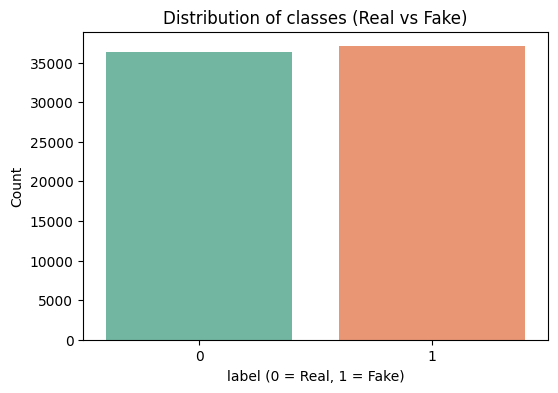

Class Distribution:
label
1    37044
0    36330
Name: count, dtype: int64


In [31]:
# Ploting class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=filtered_data, palette='Set2')
plt.title("Distribution of classes (Real vs Fake)")
plt.xlabel("label (0 = Real, 1 = Fake)")
plt.ylabel("Count")
plt.show()


print("Class Distribution:")
print(filtered_data['label'].value_counts())

<ipython-input-32-d34ac515fc8c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='viridis')


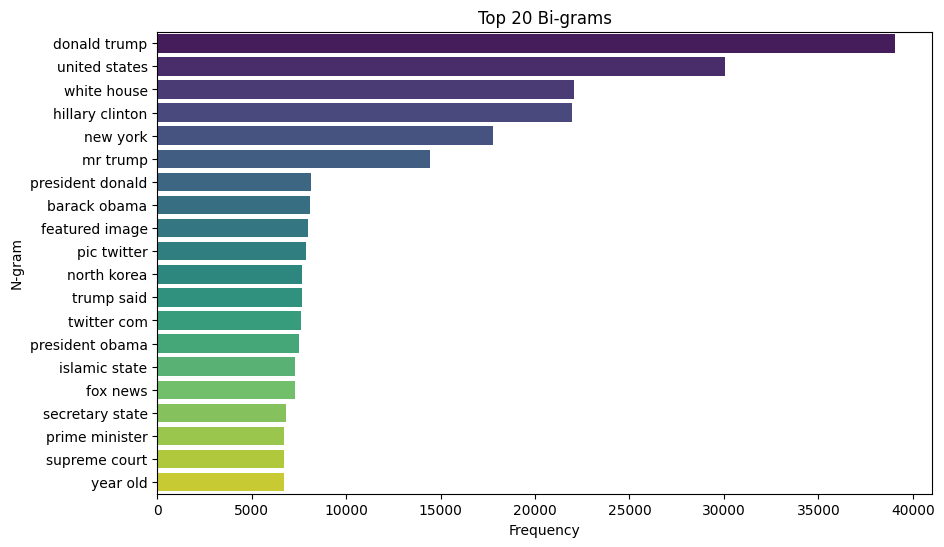

In [32]:
# Vectorizing the text for bi-grams
vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english', max_features=20)
ngrams = vectorizer.fit_transform(filtered_data['text'])
ngram_features = vectorizer.get_feature_names_out()

# Frequency of n-grams
ngram_counts = ngrams.toarray().sum(axis=0)

# Create a DataFrame
ngram_df = pd.DataFrame({'N-gram': ngram_features, 'Frequency': ngram_counts})
ngram_df = ngram_df.sort_values(by='Frequency', ascending=False)

# Plot top n-grams
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='N-gram', data=ngram_df, palette='viridis')
plt.title("Top 20 Bi-grams")
plt.show()

<ipython-input-33-3dc36fc20a0a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Bi-gram', data=tfidf_df, palette='coolwarm')


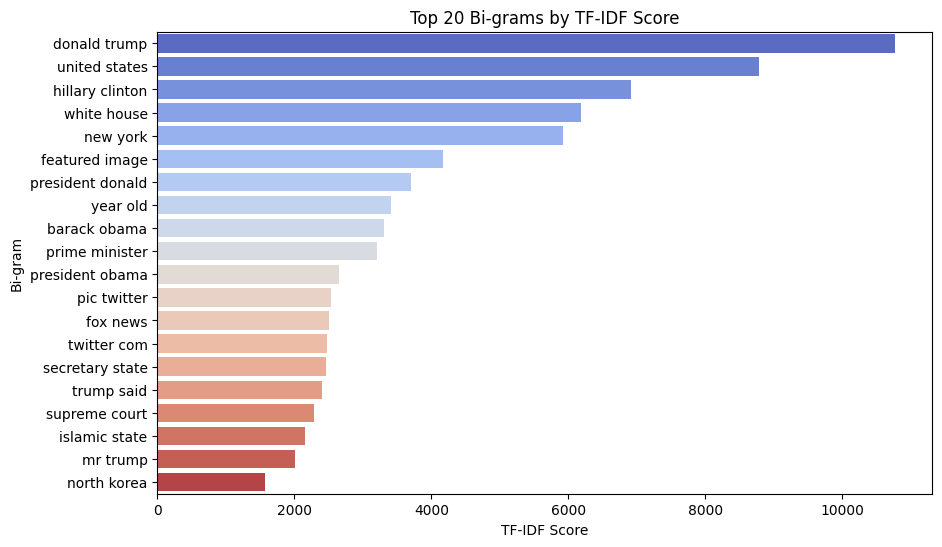

In [33]:
# Initialize the TF-IDF Vectorizer for bi-grams
tfidf = TfidfVectorizer(
    ngram_range=(2, 2),  # Bi-grams
    stop_words='english',
    max_features=20  # Top 20 bi-grams
)

# Apply TF-IDF transformation
tfidf_matrix = tfidf.fit_transform(filtered_data['text'])
tfidf_features = tfidf.get_feature_names_out()

# Get the importance of each bi-gram
tfidf_scores = tfidf_matrix.toarray().sum(axis=0)

# Create a DataFrame
tfidf_df = pd.DataFrame({'Bi-gram': tfidf_features, 'TF-IDF Score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='TF-IDF Score', ascending=False)

# Plot top bi-grams by TF-IDF score
plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF Score', y='Bi-gram', data=tfidf_df, palette='coolwarm')
plt.title("Top 20 Bi-grams by TF-IDF Score")
plt.show()

In [34]:
# Combining all engineered features
data['text_length'] = data['text'].apply(len)
data['punctuation_count'] = data['text'].apply(lambda x: sum(1 for char in x if char in '.,!?;'))
data['exclamation_count'] = data['text'].apply(lambda x: x.count('!'))
data['question_count'] = data['text'].apply(lambda x: x.count('?'))

# TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(data['text'])

# Combine TF-IDF with numerical features
import numpy as np
from scipy.sparse import hstack

numerical_features = data[['text_length', 'punctuation_count', 'exclamation_count', 'question_count']].values
X = hstack([X_tfidf, numerical_features])
y = data['label']

print(f"Feature Matrix Shape: {X.shape}")

Feature Matrix Shape: (78469, 5004)


Class distribution after SMOTE: Counter({0: 32148, 1: 32148})


<ipython-input-42-6956ed93e022>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='coolwarm')


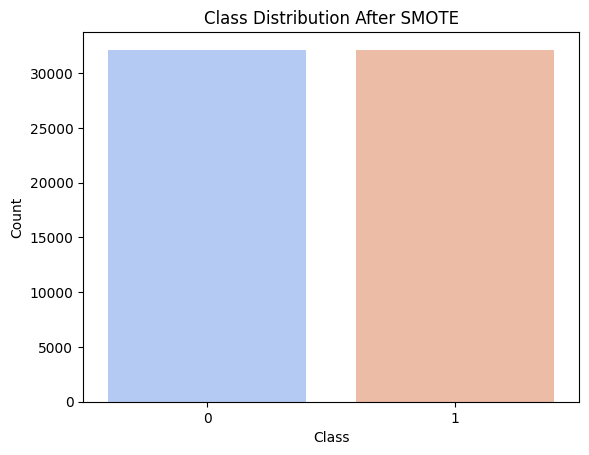

In [42]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_smote))
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution after SMOTE
class_counts = Counter(y_train_smote)
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()), palette='coolwarm')
plt.title("Class Distribution After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

Training Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Random Forest...
Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [23:51:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Making Predictions...

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      7572
           1       0.89      0.90      0.89      8122

    accuracy                           0.89     15694
   macro avg       0.89      0.89      0.89     15694
weighted avg       0.89      0.89      0.89     15694

Accuracy: 0.89

Random Forest Results:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      7572
           1       0.96      0.97      0.96      8122

    accuracy                           0.96     15694
   macro avg       0.96      0.96      0.96     15694
weighted avg       0.96      0.96      0.96     15694

Accuracy: 0.96

XGBoost Results:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7572
           1       0.95      0.97      0.96      8122

    accuracy                           0.96     15694
   

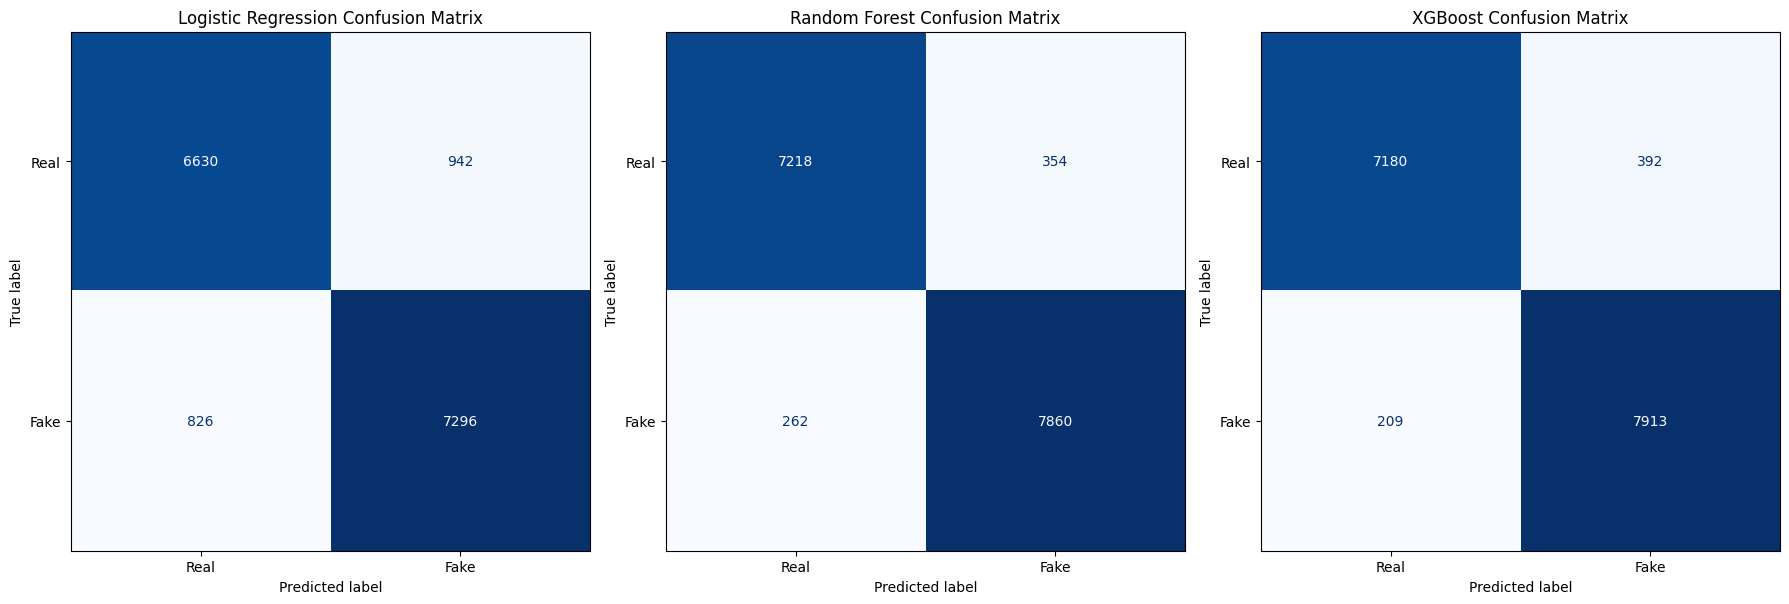


Saving Models...
Logistic Regression model saved as lr_model.pkl
Random Forest model saved as rf_model.pkl
XGBoost model saved as xgb_model.pkl

All models saved successfully!


In [45]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# Use the data split and SMOTE-applied sets (X_train_smote, y_train_smote, X_test, y_test)

# Initialize models
lr_model = LogisticRegression(random_state=42, max_iter=500)
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")

# Train Logistic Regression
print("Training Logistic Regression...")
lr_model.fit(X_train_smote, y_train_smote)

# Train Random Forest
print("Training Random Forest...")
rf_model.fit(X_train_smote, y_train_smote)

# Train XGBoost
print("Training XGBoost...")
xgb_model.fit(X_train_smote, y_train_smote)

# Predict on test set
print("\nMaking Predictions...")
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate Logistic Regression
print("\nLogistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.2f}")

# Evaluate Random Forest
print("\nRandom Forest Results:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.2f}")

# Evaluate XGBoost
print("\nXGBoost Results:")
print(classification_report(y_test, y_pred_xgb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.2f}")

# Plot confusion matrices
models_predictions = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb
}

plt.figure(figsize=(18, 6))
for i, (model_name, y_pred) in enumerate(models_predictions.items(), 1):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Real", "Fake"])
    plt.subplot(1, 3, i)
    disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
    plt.title(f"{model_name} Confusion Matrix")
plt.tight_layout()
plt.show()

# Save models using joblib
print("\nSaving Models...")
joblib.dump(lr_model, "lr_model.pkl")
print("Logistic Regression model saved as lr_model.pkl")

joblib.dump(rf_model, "rf_model.pkl")
print("Random Forest model saved as rf_model.pkl")

joblib.dump(xgb_model, "xgb_model.pkl")
print("XGBoost model saved as xgb_model.pkl")

print("\nAll models saved successfully!")

In [46]:
import joblib

# Save models
joblib.dump(lr_model, "lr_model.pkl")
joblib.dump(rf_model, "rf_model.pkl")
joblib.dump(xgb_model, "xgb_model.pkl")

# Save TF-IDF vectorizer
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Models and TF-IDF vectorizer saved successfully!")

Models and TF-IDF vectorizer saved successfully!


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(data['text'])


TfidfVectorizer(max_features=5000)

In [ ]:
import joblib
import spacy
import numpy as np

# Load the trained models and vectorizer
def load_models():
    lr_model = joblib.load("lr_model.pkl")
    rf_model = joblib.load("rf_model.pkl")
    xgb_model = joblib.load("xgb_model.pkl")
    tfidf_vectorizer = joblib.load("tfidf_vectorizer.pkl")
    return lr_model, rf_model, xgb_model, tfidf_vectorizer

lr_model, rf_model, xgb_model, tfidf_vectorizer = load_models()

# Load spaCy language model for preprocessing
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner", "tagger"])

# Preprocessing function
def preprocess_input(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]
    return " ".join(tokens)

# Consensus Prediction Function
def consensus_prediction(predictions):
    fake_votes = list(predictions.values()).count("Fake")
    return "Fake" if fake_votes >= 2 else "Real"

# Prediction function
def predict_news(input_text):
    cleaned_text = preprocess_input(input_text)
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])

    # Ensure the feature size matches all models' expectations
    n_features = min(lr_model.n_features_in_, rf_model.n_features_in_, xgb_model.n_features_in_)
    if vectorized_text.shape[1] < n_features:
        # Add padding if TF-IDF features are fewer than the models expect
        padding = np.zeros((1, n_features - vectorized_text.shape[1]))
        vectorized_text = np.hstack([vectorized_text.toarray(), padding])
    elif vectorized_text.shape[1] > n_features:
        # Trim the vectorized text if it has extra features
        vectorized_text = vectorized_text[:, :n_features]

    # Get individual model predictions
    predictions = {
        "Logistic Regression": "Fake" if lr_model.predict(vectorized_text)[0] == 1 else "Real",
        "Random Forest": "Fake" if rf_model.predict(vectorized_text)[0] == 1 else "Real",
        "XGBoost": "Fake" if xgb_model.predict(vectorized_text)[0] == 1 else "Real"
    }

    # Get consensus prediction
    final_label = consensus_prediction(predictions)
    return predictions, final_label

# Main Function
if __name__ == "__main__":
    print("Fake News Detection System")
    print("==========================")
    user_input = input("Enter a news article: ")

    if user_input.strip():
        predictions, final_result = predict_news(user_input)
        print("\nPredictions:")
        for model, result in predictions.items():
            print(f"{model}: {result}")
        print("\nOverall Result (Majority Voting):", final_result)
    else:
        print("Error: Please enter a valid news article.")
        print("Error: Please enter a valid news article.")

Fake News Detection System
